In [ ]:
import csv
import os
import re
import glob
import time
import pickle
import datetime
import warnings
import logging
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
import scipy.stats as ss
from scipy.stats import pearsonr, spearmanr
from datetime import date, datetime
import ukbiobank.utils.utils
from ukbiobank.utils import fieldNamesToIds
from ukbiobank.utils import loadCsv
from ukbiobank.utils import addFields
from ukbiobank.utils.utils import getFieldnames
from ukbiobank.utils.utils import fieldIdsToNames
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Upload UKBB file

In [ ]:
# Upload UK Bioabank csv
csv_path = '/UK_BB/ukbbdata/ukb.csv'
ukb = ukbiobank.ukbio(ukb_csv=csv_path)

In [ ]:
# Create directories
base_path = f'/UK_BB/brainbody'
brain_path = os.path.join(base_path, 'brain')
data_path = os.path.join(brain_path, 'data')
os.makedirs(base_path, exist_ok=True)
os.makedirs(brain_path, exist_ok=True)
os.makedirs(data_path, exist_ok=True)

# Get dwMRI IDP

In [ ]:
df_dwmri = ukbiobank.utils.utils.loadCsv(ukbio=ukb, fields=['eid',
25488,
25489,
25490,
25491,
25492,
25493,
25496,
25497,
25498,
25499,
25500,
25501,
25502,
25503,
25505,
25506,
25504,
25494,
25495,
25507,
25508,
25509,
25510,
25511,
25512,
25513,
25514,
25650,
25651,
25652,
25653,
25654,
25655,
25658,
25659,
25660,
25661,
25662,
25663,
25664,
25665,
25667,
25668,
25666,
25656,
25657,
25669,
25670,
25671,
25672,
25673,
25674,
25675,
25676,
25704,
25705,
25706,
25707,
25708,
25709,
25712,
25713,
25714,
25715,
25716,
25717,
25718,
25719,
25721,
25722,
25720,
25710,
25711,
25723,
25724,
25725,
25726,
25727,
25728,
25729,
25730,
25569,
25570,
25571,
25572,
25573,
25574,
25577,
25578,
25579,
25580,
25581,
25582,
25583,
25584,
25586,
25587,
25585,
25575,
25576,
25588,
25589,
25590,
25591,
25592,
25593,
25594,
25595,
25596,
25597,
25598,
25599,
25600,
25601,
25604,
25605,
25606,
25607,
25608,
25609,
25610,
25611,
25613,
25614,
25612,
25602,
25603,
25615,
25616,
25617,
25618,
25619,
25620,
25621,
25622,
25623,
25624,
25625,
25626,
25627,
25628,
25631,
25632,
25633,
25634,
25635,
25636,
25637,
25638,
25640,
25641,
25639,
25629,
25630,
25642,
25643,
25644,
25645,
25646,
25647,
25648,
25649,
25515,
25516,
25517,
25518,
25519,
25520,
25523,
25524,
25525,
25526,
25527,
25528,
25529,
25530,
25532,
25533,
25531,
25521,
25522,
25534,
25535,
25536,
25537,
25538,
25539,
25540,
25541,
25542,
25543,
25544,
25545,
25546,
25547,
25550,
25551,
25552,
25553,
25554,
25555,
25556,
25557,
25559,
25560,
25558,
25548,
25549,
25561,
25562,
25563,
25564,
25565,
25566,
25567,
25568,
25677,
25678,
25679,
25680,
25681,
25682,
25685,
25686,
25687,
25688,
25689,
25690,
25691,
25692,
25694,
25695,
25693,
25683,
25684,
25696,
25697,
25698,
25699,
25700,
25701,
25702,
25703,
25079,
25078,
25073,
25072,
25059,
25071,
25070,
25091,
25090,
25093,
25092,
25063,
25062,
25089,
25088,
25095,
25094,
25061,
25058,
25067,
25066,
25065,
25064,
25056,
25057,
25083,
25082,
25075,
25074,
25085,
25084,
25077,
25076,
25087,
25086,
25060,
25069,
25068,
25081,
25080,
25099,
25098,
25097,
25096,
25103,
25102,
25101,
25100,
25367,
25366,
25361,
25360,
25347,
25359,
25358,
25379,
25378,
25381,
25380,
25351,
25350,
25377,
25376,
25383,
25382,
25349,
25346,
25355,
25354,
25353,
25352,
25344,
25345,
25371,
25370,
25363,
25362,
25373,
25372,
25365,
25364,
25375,
25374,
25348,
25357,
25356,
25369,
25368,
25387,
25386,
25385,
25384,
25391,
25390,
25389,
25388,
25463,
25462,
25457,
25456,
25443,
25455,
25454,
25475,
25474,
25477,
25476,
25447,
25446,
25473,
25472,
25479,
25478,
25445,
25442,
25451,
25450,
25449,
25448,
25440,
25441,
25467,
25466,
25459,
25458,
25469,
25468,
25461,
25460,
25471,
25470,
25444,
25453,
25452,
25465,
25464,
25483,
25482,
25481,
25480,
25487,
25486,
25485,
25484,
25223,
25222,
25217,
25216,
25203,
25215,
25214,
25235,
25234,
25237,
25236,
25207,
25206,
25233,
25232,
25239,
25238,
25205,
25202,
25211,
25210,
25209,
25208,
25200,
25201,
25227,
25226,
25219,
25218,
25229,
25228,
25221,
25220,
25231,
25230,
25204,
25213,
25212,
25225,
25224,
25243,
25242,
25241,
25240,
25247,
25246,
25245,
25244,
25271,
25270,
25265,
25264,
25251,
25263,
25262,
25283,
25282,
25285,
25284,
25255,
25254,
25281,
25280,
25287,
25286,
25253,
25250,
25259,
25258,
25257,
25256,
25248,
25249,
25275,
25274,
25267,
25266,
25277,
25276,
25269,
25268,
25279,
25278,
25252,
25261,
25260,
25273,
25272,
25291,
25290,
25289,
25288,
25295,
25294,
25293,
25292,
25319,
25318,
25313,
25312,
25299,
25311,
25310,
25331,
25330,
25333,
25332,
25303,
25302,
25329,
25328,
25335,
25334,
25301,
25298,
25307,
25306,
25305,
25304,
25296,
25297,
25323,
25322,
25315,
25314,
25325,
25324,
25317,
25316,
25327,
25326,
25300,
25309,
25308,
25321,
25320,
25339,
25338,
25337,
25336,
25343,
25342,
25341,
25340,
25127,
25126,
25121,
25120,
25107,
25119,
25118,
25139,
25138,
25141,
25140,
25111,
25110,
25137,
25136,
25143,
25142,
25109,
25106,
25115,
25114,
25113,
25112,
25104,
25105,
25131,
25130,
25123,
25122,
25133,
25132,
25125,
25124,
25135,
25134,
25108,
25117,
25116,
25129,
25128,
25147,
25146,
25145,
25144,
25151,
25150,
25149,
25148,
25175,
25174,
25169,
25168,
25155,
25167,
25166,
25187,
25186,
25189,
25188,
25159,
25158,
25185,
25184,
25191,
25190,
25157,
25154,
25163,
25162,
25161,
25160,
25152,
25153,
25179,
25178,
25171,
25170,
25181,
25180,
25173,
25172,
25183,
25182,
25156,
25165,
25164,
25177,
25176,
25195,
25194,
25193,
25192,
25199,
25198,
25197,
25196,
25415,
25414,
25409,
25408,
25395,
25407,
25406,
25427,
25426,
25429,
25428,
25399,
25398,
25425,
25424,
25431,
25430,
25397,
25394,
25403,
25402,
25401,
25400,
25392,
25393,
25419,
25418,
25411,
25410,
25421,
25420,
25413,
25412,
25423,
25422,
25396,
25405,
25404,
25417,
25416,
25435,
25434,
25433,
25432,
25439,
25438,
25437,
25436], instance=2)
dwmri_names = ukbiobank.utils.utils.fieldIdsToNames(ukbio=ukb, df=df_dwmri)

In [ ]:
# Drop NAs, remove instance number, and save
dwmri_names_nona = dwmri_names.dropna(axis=0)
dwmri_names_nona.columns = dwmri_names_nona.columns.str.replace("-2.0", "")
dwmri_names_nona.to_csv(os.path.join(data_path, 'dwMRI/dwi_names_nona.csv'), index=False)

In [ ]:
# Rename csv files in the folders
folder_path = os.path.join(data_path, 'dwMRI')
for filename in os.listdir(folder_path):
    old_path = os.path.join(folder_path, filename)
    if not filename.endswith('.csv'):  # Skip non-CSV files
        continue
    
    try:
        if '_names_nona_names.csv' in filename:
            new_filename = filename.replace('_names_nona_names', '')
        elif '_nona.csv' in filename:
            new_filename = filename.replace('_nona', '')
        elif 'dti' in filename:
            new_filename = filename.replace('dti', 'dwi')
        else:
            continue
            
        new_path = os.path.join(folder_path, new_filename)
        
        # Skip if no change would be made
        if new_filename == filename:
            continue
            
        # Check if new filename would overwrite existing file
        if os.path.exists(new_path):
            print(f"Warning: Would overwrite {new_filename} - skipping")
            continue
            
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} -> {new_filename}")
        
    except Exception as e:
        print(f"Error renaming {filename}: {str(e)}")

print("Renaming completed.")

Renamed: dwi_names_nona_names.csv -> dwi.csv
Renaming completed.


Mean FA is the average FA value across all voxels in a region of interest (ROI) or a whole brain. Mean FA can be used to compare the overall degree of anisotropy between different groups or conditions.

Weighted-mean FA is a variation of mean FA that takes into account the spatial distribution of FA values within an ROI or a whole brain. Weighted-mean FA is calculated by multiplying each voxel’s FA value by its distance to the mean FA skeleton, and then dividing by the sum of all distances. The mean FA skeleton is a representation of the centers of all tracts common to a group of subjects, obtained by using tract-based spatial statistics (TBSS) Weighted-mean FA gives more weight to voxels that are closer to the mean FA skeleton, and less weight to voxels that are farther away. Weighted-mean FA can be used to reduce the influence of partial volume effects and inter-subject variability on mean FA estimates.

The difference between weighted-mean FA and mean FA is that weighted-mean FA is more sensitive to changes in FA that occur near the core of white matter tracts, while mean FA is more influenced by changes in FA that occur at the boundaries of white matter tracts or in regions with multiple fiber orientations. Depending on the research question and the type of diffusion data, weighted-mean FA or mean FA may be more appropriate to use as a summary measure of anisotropy.

- **Diffusion tensor** - a description of how water diffusion is altered by the presence of tissue membranes. For example, water
movement is strongly restricted perpendicular to white matter fibres but weakly along them, resulting in a elliptical diffusion
tensor. See also: MD, FA, MO, L1,2,3 [Pierpaoli and Basser, 1996, Smith et al., 2015].

- **MD** - mean diffusivity - the average strength of water diffusion, independent of direction.
- **MO** - diffusion tensor mode - a discriminant between (e.g.) the presence of a single strong fibre in a voxel, vs multiple distinct
fibres with different directions.
- **L1,2,3** - in a diffusion tensor fit, the strength of diffusion along the principal axes of the ellipse (eigenvalues).
- **ICVF** intra-cellular volume fraction - an index of white matter neurite density from NODDI modelling of dMRI data (Neurite Orien-
tation Dispersion and Density Imaging [Zhang et al., 2012, Daducci et al., 2015]). Other NODDI modelling outputs include ISOVF
(isotropic or free water volume fraction) and OD (orientation dispersion index, a measure of within-voxel tract disorganisation).

Diffusion tensor mode values measures between −1 and +1;

- approaches −1 if diffusion is occurring along a geometric plane,
- approaches +1 if diffusion is occurring along a single direction,
- approaches 0 when diffusion is orthotropic or isotropic [16].

More *positive* mode and high linear anisotropy indicate preferential diffusion along a single direction; this helps to see the structures which are arranged in linear form, for example, white matter tracts, which facilitate diffusion along one direction.

More *negative* mode and high planar anisotropy indicate preferential diffusion along a geometric plane; they display the structures that are **arranged in layers** that facilitate diffusion along a particular plane.

Diffusion tensor mode can be used to discriminate between different types of tissue structures, such as the presence of a single strong fiber in a voxel, vs multiple distinct fibers with different directions. For example, in the brain, white matter tracts are composed of bundles of axons that have high diffusion anisotropy and linear shape, while gray matter regions are composed of cell bodies and dendrites that have low diffusion anisotropy and spherical shape. If a voxel contains multiple fibers that cross or branch at different angles, the diffusion tensor mode will be closer to 1, indicating a planar shape.

### Extract modalities from dwMRI

**FA**
- TBSS

fa_tbss_train

fa_tbss_test

- Probabilistic tractography

fa_prob_train

fa_prob_test

**MD**
- TBSS

md_tbss_train

md_tbss_test

- Probabilistic tractography

md_prob_train

md_prob_test

**L1**
- TBSS

l1_tbss_train

l1_tbss_test

- Probabilistic tractography

l1_prob_train

l1_prob_test

**L2**
- TBSS

l2_tbss_train

l2_tbss_test

- Probabilistic tractography

l2_prob_train

l2_prob_test

**L3**
- TBSS

l3_tbss_train

l3_tbss_test

- Probabilistic tractography

l3_prob_train

l3_prob_test

**MO**
- TBSS

mo_tbss_train

mo_tbss_test

- Probabilistic tractographisovf_tbssy_four_train_dti_trainy

mo_prob_train

mo_prob_test

**OD**
- TBSS

od_tbss_train

od_tbss_test

- Probabilistic tractography

od_prob_train

od_prob_test

**ICVF**
- TBSS

icvf_tbss_train

icvf_tbss_test

- Probabilistic tractography

icvf_prob_train

icvf_prob_test

**ISOVF**
- TBSS

isovf_tbss_train

isovf_tbss_test

- Probabilistic tractography

isovf_prob_train

isovf_prob_test

Get columns containing individual metrics

In [ ]:
# Extract metrics
dwi = pd.read_csv(os.path.join(data_path, 'dwMRI/dwi.csv'))
metrics = {
    'FA': ['Mean FA in', 'Weighted-mean FA in'],
    'MD': ['Mean MD in', 'Weighted-mean MD in'],
    'L1': ['Mean L1 in', 'Weighted-mean L1 in'],
    'L2': ['Mean L2 in', 'Weighted-mean L2 in'],
    'L3': ['Mean L3 in', 'Weighted-mean L3 in'],
    'MO': ['Mean MO in', 'Weighted-mean MO in'],
    'OD': ['Mean OD in', 'Weighted-mean OD in'],
    'ICVF': ['Mean ICVF in', 'Weighted-mean ICVF in'],
    'ISOVF': ['Mean ISOVF in', 'Weighted-mean ISOVF in']
}

# Create output directory if it doesn't exist
output_dir = os.path.join(data_path, 'dwMRI')
os.makedirs(output_dir, exist_ok=True)

# Process and save each metric
for metric, (tbss_pattern, prob_pattern) in metrics.items():
    # ===== TBSS =====
    tbss_data = dwi.filter(regex=tbss_pattern)
    if not tbss_data.empty:
        tbss_df = pd.concat([tbss_data, dwi[['eid']]], axis=1)
        print(f"{metric} TBSS shape: {tbss_df.shape}")
        
        # Save TBSS data
        tbss_filename = f"dwi_{metric}_tbss.csv"
        tbss_path = os.path.join(output_dir, tbss_filename)
        tbss_df.to_csv(tbss_path, index=False)
        print(f"Saved: {tbss_path}")
    else:
        print(f"Warning: No {metric} TBSS metrics found!")

    # ===== Probabilistic =====
    prob_data = dwi.filter(regex=prob_pattern)
    if not prob_data.empty:
        prob_df = pd.concat([prob_data, dwi[['eid']]], axis=1)
        print(f"{metric} Probabilistic shape: {prob_df.shape}")
        
        # Save Probabilistic data
        prob_filename = f"dwi_{metric}_prob.csv"
        prob_path = os.path.join(output_dir, prob_filename)
        prob_df.to_csv(prob_path, index=False)
        print(f"Saved: {prob_path}\n")
    else:
        print(f"Warning: No {metric} Probabilistic metrics found!\n")

# Get structural connectomes

MISMATCH BETWEEN FOLDER NAME IN UKBB SHOWCASE AND FILES IN STRUCTURAL DTI MATRICES:

31024_Schaefer7n1000p_Tian_S4
- expected: 1000 + 54 = 1054 structures
- in fact: 216 structures = 200 + 16 (S1)

31025_Schaefer7n200p_Tian_S1:
- expected: 200 + 16 = 216 structures
- in fact: 554 structures = 500 + 54 (S4)

31026_Schaefer7n500p_Tian_S4
- expected: 500 + 54 = 516 structures
- in fact: 1054 structures = 1000 + 54 (S4)

In [ ]:
# Configuration
import psutil
import humanize
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import gc

BASE_PATH = "/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome"
OUTPUT_BASE = " /UK_BB/brainbody/brain/data/dwMRI/connectomes"

# Atlas configurations (name: last_chunk)
ATLAS_CONFIG = {
    '31020_aparc_a2009s_Tian_S1': '42840',
    '31021_aparc_Tian_S1': '42892',
    '31022_Glasser_Tian_S1': '42892',
    '31023_Glasser_Tian_S4': '42887',
    '31024_Schaefer7n1000p_Tian_S4': '42891',
    '31025_Schaefer7n200p_Tian_S1': '42886',
    '31026_Schaefer7n500p_Tian_S4': '42886'
}

CONNECTOME_TYPES = {
    "FA": "connectome_mean_FA_10M.csv",
    "Length": "connectome_mean_length_10M.csv",
    "SIFT2_FBC": "connectome_sift2_fbc_10M.csv",
    "Streamline_Count": "connectome_streamline_count_10M.csv"
}

In [ ]:
# Define helper functions
def print_memory_usage(label=""):
    """Print memory usage only when requested"""
    process = psutil.Process(os.getpid())
    if label:
        print(f"{label} - Memory usage: {humanize.naturalsize(process.memory_info().rss)}")

def save_results(atlas_name, results, ids):
    """Save processed data to organized directory structure"""
    print(f"\nSaving results for {atlas_name}")
    for ct in CONNECTOME_TYPES:
        output_dir = os.path.join(OUTPUT_BASE, atlas_name)
        os.makedirs(output_dir, exist_ok=True)
        
        # Save full data
        if results[ct]['full']:
            full_output_path = os.path.join(output_dir, f"{atlas_name}_{ct}_full.csv")
            print(f"Saving {ct} connectome_mean_full to {full_output_path}")
            pd.DataFrame(np.vstack(results[ct]['full']), 
                        index=ids[ct]['full']).to_csv(full_output_path)
            
            id_output_path = os.path.join(output_dir, f"{atlas_name}_{ct}_full_with_id.csv")
            print(f"Saving {ct} IDs to {id_output_path}")
            pd.DataFrame(ids[ct]['full'], columns=['eid']).to_csv(id_output_path, index=False)
        
        # Save instance 2 data
        if results[ct]['i2']:
            print(f"Getting IDs and matrices for instance 2 of {ct}")
            i2_output_path = os.path.join(output_dir, f"{atlas_name}_{ct}_i2.csv")
            print(f"Saving connectome data frame instance 2 to {i2_output_path}")
            pd.DataFrame(np.vstack(results[ct]['i2']), 
                        index=ids[ct]['i2']).to_csv(i2_output_path, index_label='eid')
            
            id_output_path = os.path.join(output_dir, f"{atlas_name}_{ct}_i2_with_id.csv")
            print(f"Converting instance 2 indices to the data frame: {id_output_path}")
            pd.DataFrame(ids[ct]['i2'], columns=['eid']).to_csv(id_output_path, index=False)

def process_atlas(atlas_name, last_chunk, batch_size=100):
    print(f"\n{'='*50}")
    print(f"Processing atlas: {atlas_name}")
    print(f"{'='*50}")
    print_memory_usage("Initial memory usage")
    
    folder_chunks = ["10000", "20000", "30000", "40000", last_chunk]
    folder_paths = [os.path.join(BASE_PATH, atlas_name, chunk, "unzipped") for chunk in folder_chunks]
    
    results = {ct: {'full': [], 'i2': []} for ct in CONNECTOME_TYPES}
    ids = {ct: {'full': [], 'i2': []} for ct in CONNECTOME_TYPES}
    missing_counts = {ct: 0 for ct in CONNECTOME_TYPES}
    skipped_folders = []
    
    for folder_path in folder_paths:
        print(f"\nStarted {folder_path}")
        if not os.path.exists(folder_path):
            print(f"Warning: Folder not found - {folder_path}")
            skipped_folders.append(folder_path)
            continue
            
        subject_folders = sorted(os.listdir(folder_path))
        batch = []
        
        for subject_folder in tqdm(subject_folders, desc=f"Processing subjects in {os.path.basename(folder_path)}"):
            subfolder_path = os.path.join(folder_path, subject_folder)
            batch.append(subject_folder)
            
            if len(batch) >= batch_size:
                process_batch(batch, folder_path, atlas_name, results, ids, missing_counts)
                batch = []
                gc.collect()
        
        # Process remaining subjects in the last batch
        if batch:
            process_batch(batch, folder_path, atlas_name, results, ids, missing_counts)
            gc.collect()
    
    print(f"\nNumber of folders without the file:")
    for ct, count in missing_counts.items():
        print(f"{ct:>20}: {count}")
    
    if skipped_folders:
        print("\nSkipped folders:")
        for folder in skipped_folders:
            print(f"- {folder}")
    
    return results, ids, missing_counts

def process_batch(batch, folder_path, atlas_name, results, ids, missing_counts):
    """Process a batch of subjects to control memory usage"""
    for subject_folder in batch:
        subfolder_path = os.path.join(folder_path, subject_folder)
        
        for ct, filename in CONNECTOME_TYPES.items():
            file_path = os.path.join(subfolder_path, filename)
            
            if not os.path.exists(file_path):
                missing_counts[ct] += 1
                continue
            
            try:
                matrix = pd.read_csv(file_path, header=None, dtype=np.float32).values
                if matrix.shape[0] != matrix.shape[1]:
                    print(f"Non-square matrix in {file_path}")
                    continue
                    
                triu_values = matrix[np.triu_indices_from(matrix, k=0)]
                
                results[ct]['full'].append(triu_values.astype(np.float32))
                ids[ct]['full'].append(subject_folder)
                
                if '_2_' in subject_folder:
                    clean_id = subject_folder.replace(f'_{atlas_name.split("_")[0]}_2_0', '')
                    results[ct]['i2'].append(triu_values.astype(np.float32))
                    ids[ct]['i2'].append(clean_id)
                    
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
                continue


STARTING PROCESSING - 31020_aparc_a2009s_Tian_S1

Processing atlas: 31020_aparc_a2009s_Tian_S1
Initial memory usage - Memory usage: 24.8 GB

Started /media/hcs-sci-psy-narun/IBu/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome/31020_aparc_a2009s_Tian_S1/10000/unzipped


Processing subjects in unzipped: 100%|██████████| 10000/10000 [15:40<00:00, 10.63it/s]



Started /media/hcs-sci-psy-narun/IBu/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome/31020_aparc_a2009s_Tian_S1/20000/unzipped


Processing subjects in unzipped: 100%|██████████| 10000/10000 [15:47<00:00, 10.56it/s]



Started /media/hcs-sci-psy-narun/IBu/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome/31020_aparc_a2009s_Tian_S1/30000/unzipped


Processing subjects in unzipped: 100%|██████████| 9999/9999 [15:38<00:00, 10.65it/s]



Started /media/hcs-sci-psy-narun/IBu/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome/31020_aparc_a2009s_Tian_S1/40000/unzipped


Processing subjects in unzipped: 100%|██████████| 10000/10000 [12:12<00:00, 13.66it/s]



Started /media/hcs-sci-psy-narun/IBu/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome/31020_aparc_a2009s_Tian_S1/42840/unzipped


Processing subjects in unzipped: 100%|██████████| 2840/2840 [03:06<00:00, 15.21it/s]



Number of folders without the file:
                  FA: 0
              Length: 0
           SIFT2_FBC: 0
    Streamline_Count: 0

Saving results for 31020_aparc_a2009s_Tian_S1
Saving FA connectome_mean_full to /media/hcs-sci-psy-narun/IBu/UK_BB/brainbody/brain/data/dwMRI/connectomes/31020_aparc_a2009s_Tian_S1/31020_aparc_a2009s_Tian_S1_FA_full.csv
Saving FA IDs to /media/hcs-sci-psy-narun/IBu/UK_BB/brainbody/brain/data/dwMRI/connectomes/31020_aparc_a2009s_Tian_S1/31020_aparc_a2009s_Tian_S1_FA_full_with_id.csv
Getting IDs and matrices for instance 2 of FA
Saving connectome data frame instance 2 to /media/hcs-sci-psy-narun/IBu/UK_BB/brainbody/brain/data/dwMRI/connectomes/31020_aparc_a2009s_Tian_S1/31020_aparc_a2009s_Tian_S1_FA_i2.csv
Converting instance 2 indices to the data frame: /media/hcs-sci-psy-narun/IBu/UK_BB/brainbody/brain/data/dwMRI/connectomes/31020_aparc_a2009s_Tian_S1/31020_aparc_a2009s_Tian_S1_FA_i2_with_id.csv
Saving Length connectome_mean_full to /media/hcs-sci-psy-na

Processing subjects in unzipped: 100%|██████████| 10000/10000 [14:38<00:00, 11.38it/s]



Started /media/hcs-sci-psy-narun/IBu/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome/31021_aparc_Tian_S1/20000/unzipped


Processing subjects in unzipped: 100%|██████████| 10000/10000 [13:49<00:00, 12.06it/s]



Started /media/hcs-sci-psy-narun/IBu/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome/31021_aparc_Tian_S1/30000/unzipped


Processing subjects in unzipped: 100%|██████████| 9999/9999 [12:01<00:00, 13.86it/s]



Started /media/hcs-sci-psy-narun/IBu/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome/31021_aparc_Tian_S1/40000/unzipped


Processing subjects in unzipped: 100%|██████████| 10000/10000 [10:53<00:00, 15.30it/s]



Started /media/hcs-sci-psy-narun/IBu/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome/31021_aparc_Tian_S1/42892/unzipped


Processing subjects in unzipped: 100%|██████████| 2892/2892 [02:41<00:00, 17.89it/s]



Number of folders without the file:
                  FA: 0
              Length: 0
           SIFT2_FBC: 0
    Streamline_Count: 0

Saving results for 31021_aparc_Tian_S1
Saving FA connectome_mean_full to /media/hcs-sci-psy-narun/IBu/UK_BB/brainbody/brain/data/dwMRI/connectomes/31021_aparc_Tian_S1/31021_aparc_Tian_S1_FA_full.csv
Saving FA IDs to /media/hcs-sci-psy-narun/IBu/UK_BB/brainbody/brain/data/dwMRI/connectomes/31021_aparc_Tian_S1/31021_aparc_Tian_S1_FA_full_with_id.csv
Getting IDs and matrices for instance 2 of FA
Saving connectome data frame instance 2 to /media/hcs-sci-psy-narun/IBu/UK_BB/brainbody/brain/data/dwMRI/connectomes/31021_aparc_Tian_S1/31021_aparc_Tian_S1_FA_i2.csv
Converting instance 2 indices to the data frame: /media/hcs-sci-psy-narun/IBu/UK_BB/brainbody/brain/data/dwMRI/connectomes/31021_aparc_Tian_S1/31021_aparc_Tian_S1_FA_i2_with_id.csv
Saving Length connectome_mean_full to /media/hcs-sci-psy-narun/IBu/UK_BB/brainbody/brain/data/dwMRI/connectomes/31021_apar

In [ ]:
# Run atlas extraction
if __name__ == "__main__":
    try:
        for atlas_name, last_chunk in ATLAS_CONFIG.items():
            print("\n" + "="*50)
            print(f"STARTING PROCESSING - {atlas_name}")
            print("="*50)
            
            results, ids, missing_counts = process_atlas(atlas_name, last_chunk)
            save_results(atlas_name, results, ids)
            
            del results, ids
            gc.collect()
            print_memory_usage("Memory after cleanup")
            
        print("\nAll atlases processed successfully!")
        
    except MemoryError:
        print("\n!!! MEMORY ERROR OCCURRED !!!")
        print("Try reducing:")
        print("- Batch size (currently 100)")
        print("- Number of connectome types processed simultaneously")
        print_memory_usage("Memory at crash")
    except Exception as e:
        print(f"\n!!! UNEXPECTED ERROR: {str(e)} !!!")

# Execute extraction code on the server

In [ ]:
connectomes_dir = '/UK_BB/brainbody/brain/data/dwMRI/connectomes'

In [ ]:
# Configuration
# ========================
import os
import sys
import gc
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm

# ========================
# PATHS AND CONFIG
# ========================
BASE_PATH = "/UK_BB/ukbbdata/Melbourne_BULK/DTI_connectome"
OUTPUT_BASE = "/UK_BB/brainbody/brain/data/dwMRI/connectomes"

# Atlas configurations (name: last_chunk)
ATLAS_CONFIG = {
    '31020_aparc_a2009s_Tian_S1': '42840',
    '31021_aparc_Tian_S1': '42892',
    '31022_Glasser_Tian_S1': '42892',
    '31023_Glasser_Tian_S4': '42887',
    '31024_Schaefer7n1000p_Tian_S4': '42891',
    '31025_Schaefer7n200p_Tian_S1': '42886',
    '31026_Schaefer7n500p_Tian_S4': '42886'
}

CONNECTOME_TYPES = {
    "FA": "connectome_mean_FA_10M.csv",
    "Length": "connectome_mean_length_10M.csv",
    "SIFT2_FBC": "connectome_sift2_fbc_10M.csv",
    "Streamline_Count": "connectome_streamline_count_10M.csv"
}

# Common folder chunks
FOLDER_CHUNKS = ["10000", "20000", "30000", "40000"]

# ========================
# FUNCTIONS
# ========================
def save_results(atlas_name, results, ids, connectome_type):
    """Save processed data for specific connectome type"""
    output_dir = os.path.join(OUTPUT_BASE, atlas_name)
    os.makedirs(output_dir, exist_ok=True)
    
    # Save full data
    if results['full']:
        full_output_path = os.path.join(output_dir, f"{atlas_name}_{connectome_type}_full.csv")
        print(f"Saving {connectome_type} connectome to {full_output_path}")
        pd.DataFrame(np.vstack(results['full']), 
                    index=ids['full']).to_csv(full_output_path)
        
        id_output_path = os.path.join(output_dir, f"{atlas_name}_{connectome_type}_full_id.csv")
        pd.DataFrame(ids['full'], columns=['eid']).to_csv(id_output_path, index=False)
    
    # Save instance 2 data
    if results['i2']:
        i2_output_path = os.path.join(output_dir, f"{atlas_name}_{connectome_type}_i2.csv")
        print(f"Saving instance 2 data to {i2_output_path}")
        pd.DataFrame(np.vstack(results['i2']), 
                    index=ids['i2']).to_csv(i2_output_path, index_label='eid')
        
        id_output_path = os.path.join(output_dir, f"{atlas_name}_{connectome_type}_i2_id.csv")
        pd.DataFrame(ids['i2'], columns=['eid']).to_csv(id_output_path, index=False)

def process_atlas(atlas_name, last_chunk, connectome_type, filename):
    """Process a single atlas and connectome type combination"""
    print(f"\n{'='*50}")
    print(f"Processing {atlas_name} - {connectome_type}")
    print(f"{'='*50}")
    
    folder_chunks = FOLDER_CHUNKS + [last_chunk]
    folder_paths = [os.path.join(BASE_PATH, atlas_name, chunk, "unzipped") for chunk in folder_chunks]
    
    results = {'full': [], 'i2': []}
    ids = {'full': [], 'i2': []}
    missing_count = 0
    
    for folder_path in folder_paths:
        if not os.path.exists(folder_path):
            print(f"Warning: Folder not found - {folder_path}")
            continue
            
        subject_folders = sorted(os.listdir(folder_path))
        
        for subject_folder in tqdm(subject_folders, desc=f"Processing {os.path.basename(folder_path)}"):
            file_path = os.path.join(folder_path, subject_folder, filename)
            
            if not os.path.exists(file_path):
                missing_count += 1
                continue
            
            try:
                matrix = pd.read_csv(file_path, header=None, dtype=np.float32).values
                if matrix.shape[0] != matrix.shape[1]:
                    print(f"Non-square matrix in {file_path}")
                    continue
                    
                triu_values = matrix[np.triu_indices_from(matrix, k=0)]
                
                results['full'].append(triu_values.astype(np.float32))
                ids['full'].append(subject_folder)
                
                if '_2_' in subject_folder:
                    clean_id = subject_folder.replace(f'_{atlas_name.split("_")[0]}_2_0', '')
                    results['i2'].append(triu_values.astype(np.float32))
                    ids['i2'].append(clean_id)
                    
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
                continue
    
    print(f"\nMissing files count for {connectome_type}: {missing_count}")
    return results, ids

# ========================
# MAIN EXECUTION
# ========================
def main():
    # Convert config to list for indexing
    atlas_items = list(ATLAS_CONFIG.items())
    connectome_items = list(CONNECTOME_TYPES.items())
    
    # Calculate total tasks (atlases × connectome types)
    total_tasks = len(atlas_items) * len(connectome_items)
    
    # SLURM task handling
    if len(sys.argv) > 1:
        task_id = int(sys.argv[1])
        atlas_idx = task_id % len(atlas_items)
        connectome_idx = task_id // len(atlas_items)
        
        if connectome_idx < len(connectome_items):
            atlas_name, last_chunk = atlas_items[atlas_idx]
            connectome_type, filename = connectome_items[connectome_idx]
            
            print(f"Processing task {task_id}: {atlas_name} - {connectome_type}")
            results, ids = process_atlas(atlas_name, last_chunk, connectome_type, filename)
            save_results(atlas_name, results, ids, connectome_type)
        else:
            print(f"Task ID {task_id} exceeds maximum tasks ({total_tasks})")
    else:
        # Local execution - process all combinations
        for atlas_name, last_chunk in atlas_items:
            for connectome_type, filename in connectome_items:
                print(f"\nProcessing {atlas_name} - {connectome_type}")
                results, ids = process_atlas(atlas_name, last_chunk, connectome_type, filename)
                save_results(atlas_name, results, ids, connectome_type)
                gc.collect()

if __name__ == "__main__":
    try:
        main()
        print("\nProcessing complete!")
    except MemoryError:
        print("\n!!! MEMORY ERROR OCCURRED !!!")
        sys.exit(1)
    except Exception as e:
        print(f"\n!!! UNEXPECTED ERROR: {str(e)} !!!")
        sys.exit(1)

#####################################################

Sanity check: check the number of columns in the file

In [ ]:
# Glasser Tian S1
with open(os.path.join(connectomes_dir, '31022_Glasser_Tian_S1/Glasser_Tian_S1_SIFT2_FBC_i2.csv'), "r") as f:
  reader = csv.reader(f, delimiter=",")
  first_row = next(reader)
  num_columns = len(first_row)
  print(num_columns)

with open('/UK_BB/ML_DATASETS/Brain/DTI/Structural_matrices/31022_Glasser_Tian_S1/Connectome_sift2_fbc_10M/31022_Glasser_Tian_S1_connectome_sift2_fbc_10M_instance_2_df.csv', "r") as f:
  reader = csv.reader(f, delimiter=",")
  first_row = next(reader)
  num_columns = len(first_row)
  print(num_columns)

70877
70877


In [ ]:
# aparc Tian S1
with open(os.path.join(connectomes_dir, '31021_aparc_Tian_S1/aparc_Tian_S1_FA_i2.csv'), "r") as f:
  reader = csv.reader(f, delimiter=",")
  first_row = next(reader)
  num_columns = len(first_row)
  print(num_columns)

with open(os.path.join(connectomes_dir, '31021_aparc_Tian_S1/aparc_Tian_S1_Length_i2.csv'), "r") as f:
  reader = csv.reader(f, delimiter=",")
  first_row = next(reader)
  num_columns = len(first_row)
  print(num_columns)

3571
3571


In [ ]:
# Rename files for better readability
def rename_files(root_dir, folder_patterns):
    import glob
    """
    Renames files across specified folders with pattern-specific rules.
    
    Args:
        root_dir (str): Parent directory containing subfolders.
        folder_patterns (dict): Dictionary of {folder_pattern: renaming_rules}
    """
    # Get all subdirectories matching our patterns
    subdirs = [d for d in glob.glob(os.path.join(root_dir, '*'))  # Changed glob() to glob.glob()
              if os.path.isdir(d) and any(p in d for p in folder_patterns.keys())]
    
    for folder in subdirs:
        folder_name = os.path.basename(folder)
        print(f"\nProcessing folder: {folder_name}")
        
        # Find which pattern matches this folder
        pattern = next(p for p in folder_patterns if p in folder_name)
        rules = folder_patterns[pattern]
        
        for filename in os.listdir(folder):
            filepath = os.path.join(folder, filename)
            if os.path.isdir(filepath):
                continue
                
            new_name = filename
            
            # Apply pattern-specific renaming rules
            for old_str in rules.get('remove', []):
                new_name = new_name.replace(old_str, '')
                
            for old, new in rules.get('replace', {}).items():
                new_name = new_name.replace(old, new)
            
            # Clean up residual double underscores
            #new_name = new_name.replace('__', '_').replace('___', '_')
            
            if new_name != filename:
                new_path = os.path.join(folder, new_name)
                if not os.path.exists(new_path):
                    os.rename(filepath, new_path)
                    print(f"Renamed: {filename} → {new_name}")
                else:
                    print(f"Conflict: {new_name} already exists!")

# Configuration for each folder pattern
FOLDER_RULES = {
    '31020_aparc_a2009s_Tian_S1': {
        'remove': ['31020_',],
        'replace': {'_with_id': '_id',}
    },
    '31021_aparc_Tian_S1': {
        'remove': [ '31021_',],
        'replace': {'_with_id': '_id'}
    },
    '31022_Glasser_Tian_S1': {
        'remove': ['31022_',]
    },
    '31023_Glasser_Tian_S4': {
        'remove': ['31023_',]
    },
    '31024_Schaefer7n1000p_Tian_S4': {
        'remove': ['31024_',]
    },
    '31025_Schaefer7n200p_Tian_S1': {
        'remove': ['31025_',]
    },
        '31026_Schaefer7n500p_Tian_S4': {
        'remove': ['31026_',],
    }
}

root_directory = "/UK_BB/brainbody/brain/data/dwMRI/connectomes"
rename_files(
    root_dir=root_directory,
    folder_patterns=FOLDER_RULES
)


Processing folder: 31026_Schaefer7n500p_Tian_S4
Renamed: 31026_Schaefer7n500p_Tian_S4_FA_full.csv → Schaefer7n500p_Tian_S4_FA_full.csv
Renamed: 31026_Schaefer7n500p_Tian_S4_SIFT2_FBC_full.csv → Schaefer7n500p_Tian_S4_SIFT2_FBC_full.csv
Renamed: 31026_Schaefer7n500p_Tian_S4_Length_full.csv → Schaefer7n500p_Tian_S4_Length_full.csv
Renamed: 31026_Schaefer7n500p_Tian_S4_Streamline_Count_full_id.csv → Schaefer7n500p_Tian_S4_Streamline_Count_full_id.csv
Renamed: 31026_Schaefer7n500p_Tian_S4_Length_full_id.csv → Schaefer7n500p_Tian_S4_Length_full_id.csv
Renamed: 31026_Schaefer7n500p_Tian_S4_Streamline_Count_i2.csv → Schaefer7n500p_Tian_S4_Streamline_Count_i2.csv
Renamed: 31026_Schaefer7n500p_Tian_S4_SIFT2_FBC_full_id.csv → Schaefer7n500p_Tian_S4_SIFT2_FBC_full_id.csv
Renamed: 31026_Schaefer7n500p_Tian_S4_FA_i2_id.csv → Schaefer7n500p_Tian_S4_FA_i2_id.csv
Renamed: 31026_Schaefer7n500p_Tian_S4_Streamline_Count_i2_id.csv → Schaefer7n500p_Tian_S4_Streamline_Count_i2_id.csv
Renamed: 31026_Schaefe

# DTI Confounds

### List of [potential] confounds

- Head size: 25000

*Other*
- Discrepancy between dMRI brain image and T1 brain image: 25737
- dMRI Scaling: 25928 (Intensity scaling for dMRI)

*Table position*
- X-position of centre-of-gravity of brain mask in scanner co-ordinates: 25756
- Z-position of centre-of-gravity of brain mask in scanner co-ordinates: 25758
- Y-position of back of brain mask in scanner co-ordinates: 25757
- Scanner table position: 25759 (Z-co-ordinate of the coil (and the scanner table that the coil sits on) within the scanner. The Z axis points down the centre of the magnet) / -999999 represents "Measure not cleanly recoverable from data"

*Head Motion*
- 90th percentile of relative head motion from dMRI: 24455
- 90th percentile of absolute head motion from dMRI: 24452
- Mean absolute head motion from dMRI: 24450
- Mean relative head motion from dMRI: 24453
- Median absolute head motion from dMRI: 24451
- Median relative head motion from dMRI: 24454
- Structural motion: 24419

*Eddy*
- Number of slices that Eddy estimated to be outliers in dMRI data: 24456
- Number of dMRI outlier slices detected and corrected: 25746
- New Eddy: 25921 (Whether increased search space in eddy current estimation was used for dMRI)
- YTranslation: 25922 (Standard deviation of apparent translation in the Y axis as measured by eddy)
- Discrepancy between T1 brain image and standard-space brain template (linearly-aligned): 25731
- Discrepancy between T1 brain image and standard-space brain template (nonlinearly-aligned): 25732

[Forum](https://www.jiscmail.ac.uk/cgi-bin/webadmin?A0=UKB-NEUROIMAGING)

The following variables were not found:
[24455, 24452, 24453, 24450, 24451, 24454, 24419, 24456]

- 90th percentile of relative head motion from dMRI: 24455
- 90th percentile of absolute head motion from dMRI: 24452
- Mean relative head motion from dMRI: 24453
- Mean absolute head motion from dMRI: 24450
- Median absolute head motion from dMRI: 24451
- Median relative head motion from dMRI: 24454
- Structural motion: 24419
- Number of slices that Eddy estimated to be outliers in dMRI data: 24456

'SIMPLE' set of confounds (without sociodemographics):
- Head size (1 per site)
- Site (2 variables)
- Head motion (mean relative motion as calculated by FEAT) in resting fMRI (1 per site) +?
- Head motion (mean relative motion as calculated by FEAT) in task fMRI (1 per site) +?
- Date (number of days when the acquisition happened since the acquisitions started) (1 per site) ?
- Date squared (1 per site) ?

Non-linear confounds

"Non-linear transformations of age (2.25%), table position (4.44%), or head motion (3.3%). It is also interesting to note that T1w, dMRI and rfMRI Amplitude IDPs were more strongly affected in general by non-linear transformations, compared with other classes of IDPs"

Brain position measures and their squared values, head motion measures and their squared values, volumetric scaling, and estimated total intracranial volume, total brain volume (for traits other than total brain volume itself)

### Get the main set of confounds from the 'big' csv

In [ ]:
df_dwmri_conf = ukbiobank.utils.utils.loadCsv(ukbio=ukb, fields=['eid',
25731,
25732,
25741,
25742,
25000,
54,
25737,
25928,
53,
25756,
25758,
25757,
25759,
25746,
25921,
25922,
25731,
20218,
25780], instance=2)
dwmri_conf_names = ukbiobank.utils.utils.fieldIdsToNames(ukbio=ukb, df=df_dwmri_conf)
#24455, 24452,24453,24450,24451,24454,24419,24456 not found

In [ ]:
# Drop NAs, remove instance number, and save
dwmri_conf_names = dwmri_conf_names.drop(columns = [
'Acquisition protocol phase.-2.0',
'Multiband diffusion brain images - DICOM-2.0',
'Date of attending assessment centre-2.0',
'Intensity scaling for dMRI-2.0',
'UK Biobank assessment centre-2.0',
'Mean tfMRI head motion, averaged across space and time points-2.0',
'Mean rfMRI head motion, averaged across space and time points-2.0'])

dwmri_conf_names.to_csv(os.path.join(data_path, 'dwMRI/dwmri_conf_names.csv'), index=False)
dwmri_conf_names_nona = dwmri_conf_names.dropna(axis=0)
dwmri_conf_names_nona.columns = dwmri_conf_names_nona.columns.str.replace('-2.0', '')
print('Shape:', dwmri_conf_names_nona.shape)
dwmri_conf_names_nona.to_csv(os.path.join(data_path, 'dwMRI/dwmri_conf_names_nona.csv'), index=False)

/tmp/ipykernel_120620/510901813.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dwmri_conf_names_nona.columns = dwmri_conf_names_nona.columns.str.replace('-2.0', '')


Shape: (44056, 12)


In [ ]:
print('% missing')
with pd.option_context('display.max_rows', None):
    display(((dwmri_conf_names.isna().sum() / len(dwmri_conf_names)).round(2)*100).sort_values(ascending=False))

% missing


Number of dMRI outlier slices detected and corrected-2.0                                          91.0
Standard deviation of apparent translation in the Y axis as measured by eddy-2.0                  91.0
Increased search space in eddy current estimation used for dMRI-2.0                               91.0
Scanner lateral (X) brain position-2.0                                                            91.0
Discrepancy between T1 brain image and standard-space brain template (nonlinearly-aligned)-2.0    91.0
Discrepancy between T1 brain image and standard-space brain template (linearly-aligned)-2.0       91.0
Scanner table position-2.0                                                                        91.0
Scanner longitudinal (Z) brain position-2.0                                                       91.0
Discrepancy between dMRI brain image and T1 brain image-2.0                                       91.0
Volumetric scaling from T1 head image to standard space-2.0              

### Manually upload confounds that could not be uploaded from the big csv file with UKBB utils

- Structural motion: 24419
- Mean absolute head motion from dMRI: 24450
- Median absolute head motion from dMRI: 24451
- 90th percentile of absolute head motion from dMRI: 24452
- Mean relative head motion from dMRI: 24453
- Median relative head motion from dMRI: 24454
- 90th percentile of relative head motion from dMRI: 24455
- Number of slices that Eddy estimated to be outliers in dMRI data: 24456

In [ ]:
dwmri_conf_add = pd.read_csv('/UK_BB/ukbbdata/ukb.csv', usecols=[
'eid',
'24419-2.0',
'24450-2.0',
'24451-2.0',
'24452-2.0',
'24453-2.0',
'24454-2.0',
'24455-2.0',
'24456-2.0'])
dwmri_conf_add_full = dwmri_conf_add.rename(columns = {
'24419-2.0':'Structural motion',
'24450-2.0':'Mean absolute head motion from dMRI',
'24451-2.0':'Median absolute head motion from dMRI',
'24452-2.0':'90th percentile of absolute head motion from dMRI',
'24453-2.0':'Mean relative head motion from dMRI',
'24454-2.0':'Median relative head motion from dMRI',
'24455-2.0':'90th percentile of relative head motion from dMRI',
'24456-2.0':'Number of slices that Eddy estimated to be outliers in dMRI data'
})

dwmri_conf_add_full.to_csv(os.path.join(data_path, 'dwMRI/dwmri_conf_add_full.csv'), index=False)
print('% missing')
with pd.option_context('display.max_rows', None):
    display(((dwmri_conf_add_full.isna().sum() / len(dwmri_conf_add_full)).round(2)*100).sort_values(ascending=False))

% missing


Mean absolute head motion from dMRI                                 91.0
Median absolute head motion from dMRI                               91.0
90th percentile of absolute head motion from dMRI                   91.0
Mean relative head motion from dMRI                                 91.0
Median relative head motion from dMRI                               91.0
90th percentile of relative head motion from dMRI                   91.0
Number of slices that Eddy estimated to be outliers in dMRI data    91.0
Structural motion                                                   90.0
eid                                                                  0.0
dtype: float64

In [ ]:
dwmri_conf_add = dwmri_conf_add_full.drop(columns = [
'Mean absolute head motion from dMRI',
'Mean relative head motion from dMRI',
'90th percentile of absolute head motion from dMRI',
'90th percentile of relative head motion from dMRI'
])
dwmri_conf_add = dwmri_conf_add.dropna(axis=0).reset_index(drop=True)
print('Shape:', dwmri_conf_add.shape)
dwmri_conf_add.to_csv(os.path.join(data_path, 'dwMRI/dwmri_conf_add.csv'), index=False)

Shape: (47380, 5)


In [ ]:
# Combine all confounds
dwi_conf = dwmri_conf_names_nona.merge(dwmri_conf_add, how='inner', on='eid').reset_index(drop=True)
dwi_conf.columns = dwi_conf.columns.str.replace("-2.0", "")

print('Shape:', dwi_conf.shape)
with pd.option_context('display.max_rows', None):
    display(((dwi_conf.isna().sum() / len(dwmri_conf_add_full)).round(2)*100).sort_values(ascending=False))

dwi_conf.to_csv(os.path.join(data_path, 'dwMRI/dwi_conf.csv'), index=False)

Shape: (44056, 16)


/tmp/ipykernel_120620/3082187305.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dwi_conf.columns = dwi_conf.columns.str.replace("-2.0", "")


Number of dMRI outlier slices detected and corrected                                          0.0
Standard deviation of apparent translation in the Y axis as measured by eddy                  0.0
Increased search space in eddy current estimation used for dMRI                               0.0
Scanner lateral (X) brain position                                                            0.0
Discrepancy between T1 brain image and standard-space brain template (nonlinearly-aligned)    0.0
Discrepancy between T1 brain image and standard-space brain template (linearly-aligned)       0.0
Scanner table position                                                                        0.0
Scanner longitudinal (Z) brain position                                                       0.0
Discrepancy between dMRI brain image and T1 brain image                                       0.0
Volumetric scaling from T1 head image to standard space                                       0.0
Scanner transverse (

Explore confounds

In [ ]:
with pd.option_context('display.max_columns', None):
    display(dwi_conf.drop(columns = 'eid').describe().round(2))

,Number of dMRI outlier slices detected and corrected,Standard deviation of apparent translation in the Y axis as measured by eddy,Increased search space in eddy current estimation used for dMRI,Scanner lateral (X) brain position,Discrepancy between T1 brain image and standard-space brain template (nonlinearly-aligned),Discrepancy between T1 brain image and standard-space brain template (linearly-aligned),Scanner table position,Scanner longitudinal (Z) brain position,Discrepancy between dMRI brain image and T1 brain image,Volumetric scaling from T1 head image to standard space,Scanner transverse (Y) brain position,Structural motion,Median absolute head motion from dMRI,Median relative head motion from dMRI,Number of slices that Eddy estimated to be outliers in dMRI data
count,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00,44056.00
mean,46.20,1.03,0.30,0.79,0.49,0.67,-1053.21,-29.22,0.58,1.30,66.68,0.34,1.09,1.02,46.20
std,34.06,0.46,0.46,3.11,0.03,0.04,24.13,25.93,0.07,0.12,6.00,0.15,0.48,0.41,34.06
min,0.00,0.12,0.00,-41.09,0.36,0.55,-1197.00,-96.76,0.32,0.80,52.00,-1.86,0.28,0.24,0.00
25%,26.00,0.72,0.00,-1.10,0.47,0.64,-1042.00,-45.00,0.53,1.21,62.00,0.24,0.77,0.72,26.00
50%,39.00,0.90,0.00,0.68,0.49,0.66,-1042.00,-34.97,0.58,1.30,66.00,0.32,0.97,0.94,39.00
75%,56.00,1.19,1.00,2.58,0.52,0.69,-1042.00,-23.12,0.63,1.38,71.00,0.42,1.28,1.25,56.00
max,519.00,3.83,1.00,18.24,0.67,0.91,-1020.00,124.46,0.97,1.94,96.00,6.96,7.32,3.62,519.00


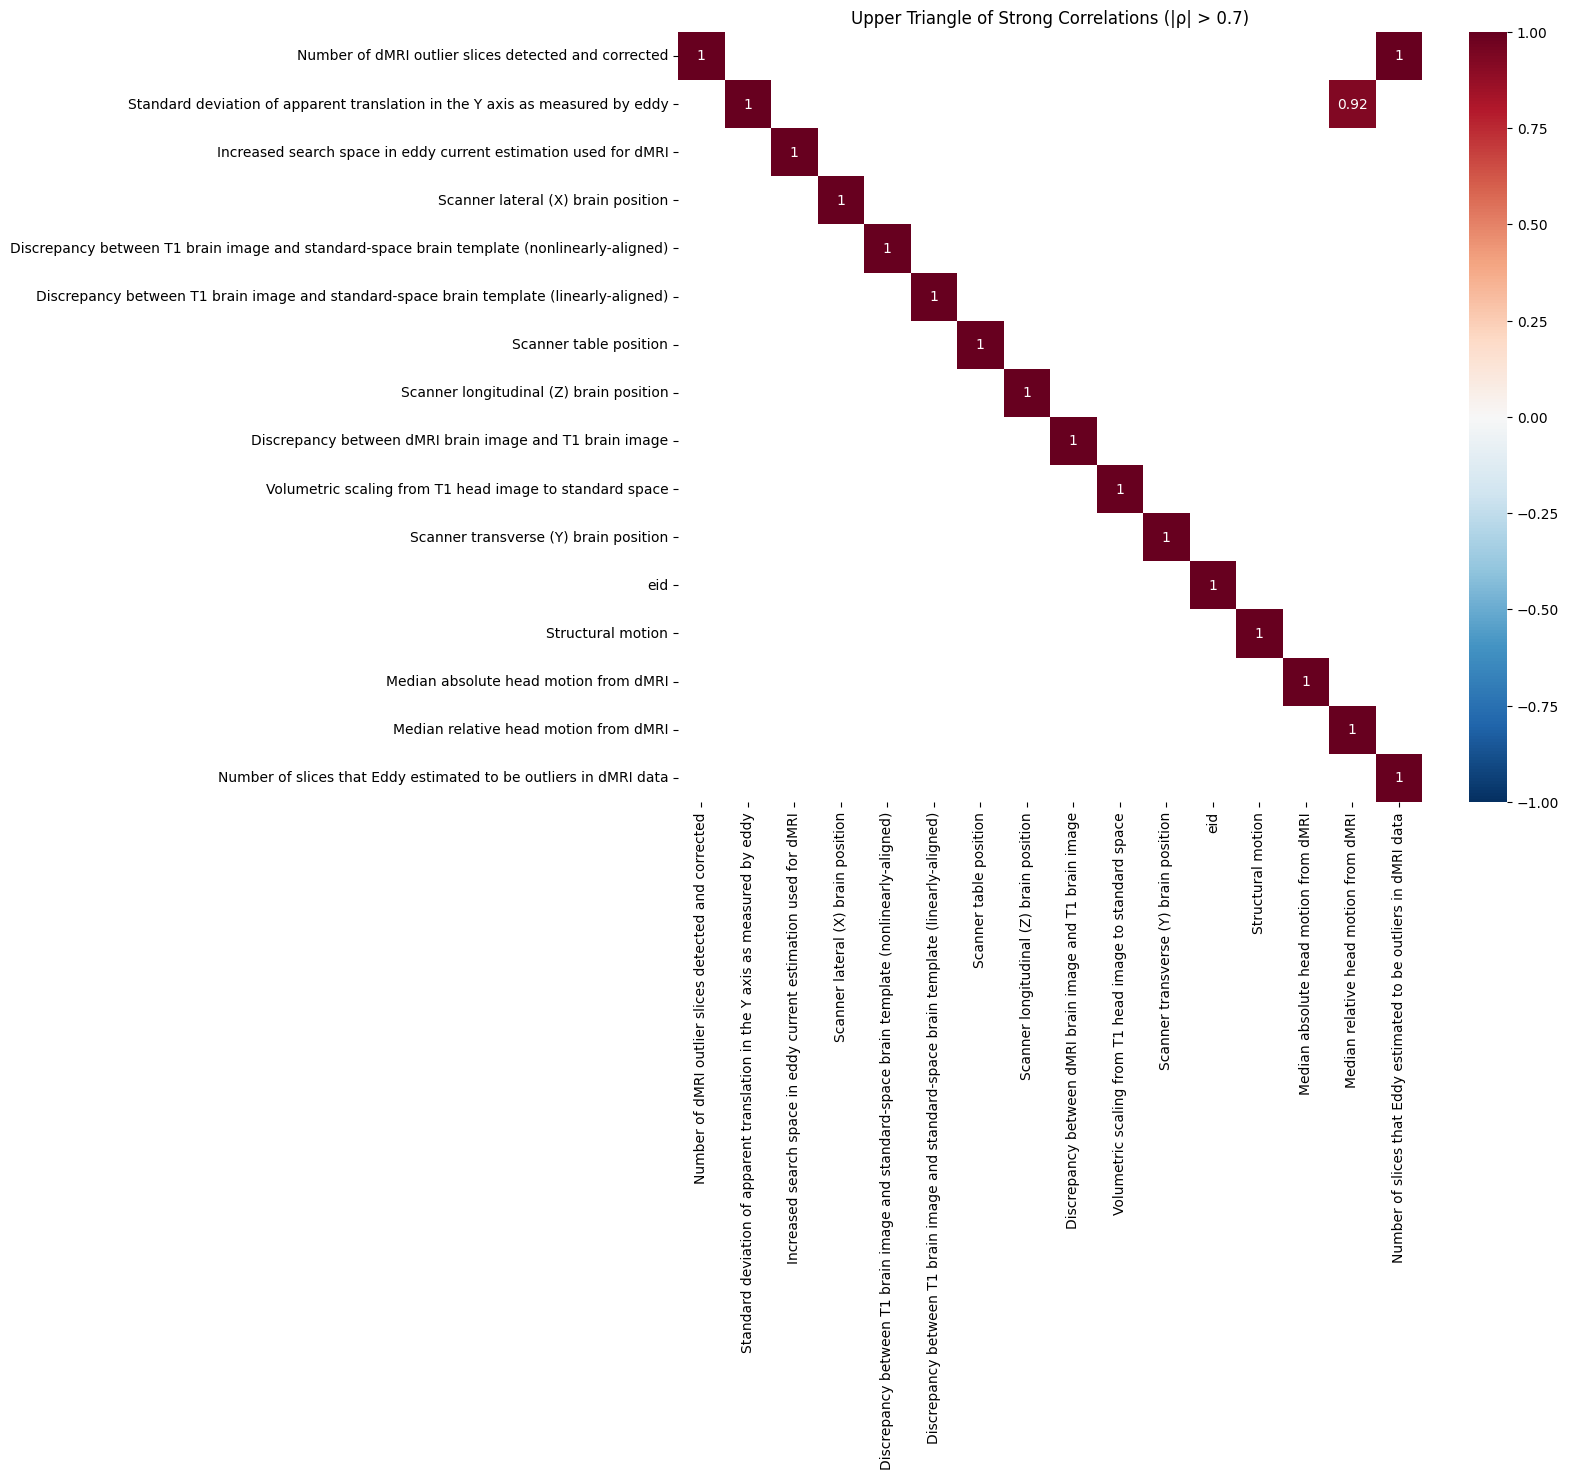

In [ ]:
# Compute correlations between confounds
dwi_conf = pd.read_csv(os.path.join(data_path, 'dwMRI/dwi_conf.csv'))
rho, p = spearmanr(dwi_conf)
p = pd.DataFrame(p, columns = dwi_conf.columns, index=dwi_conf.columns).T
rho = pd.DataFrame(rho, columns = dwi_conf.columns, index=dwi_conf.columns).T
rho_sign = rho.where(rho > 0.7)
# Plot corelations between confounds
mask = np.triu(np.ones_like(rho, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(rho.where(mask & (np.abs(rho)>0.7)), 
            annot=True, 
            cmap='RdBu_r',
            center=0,
            vmin=-1, vmax=1)
plt.title("Upper Triangle of Strong Correlations (|ρ| > 0.7)")
plt.show()

In [ ]:
# Drop highly correlated confounds and save
dwi_conf = dwi_conf.drop(columns = [
'Number of slices that Eddy estimated to be outliers in dMRI data',
'Standard deviation of apparent translation in the Y axis as measured by eddy'])
dwi_conf.to_csv(os.path.join(data_path, 'dwMRI/dwi_conf.csv'), index=False)
dwi_conf.columns.to_list()

['Number of dMRI outlier slices detected and corrected',
 'Increased search space in eddy current estimation used for dMRI',
 'Scanner lateral (X) brain position',
 'Discrepancy between T1 brain image and standard-space brain template (nonlinearly-aligned)',
 'Discrepancy between T1 brain image and standard-space brain template (linearly-aligned)',
 'Scanner table position',
 'Scanner longitudinal (Z) brain position',
 'Discrepancy between dMRI brain image and T1 brain image',
 'Volumetric scaling from T1 head image to standard space',
 'Scanner transverse (Y) brain position',
 'eid',
 'Structural motion',
 'Median absolute head motion from dMRI',
 'Median relative head motion from dMRI']

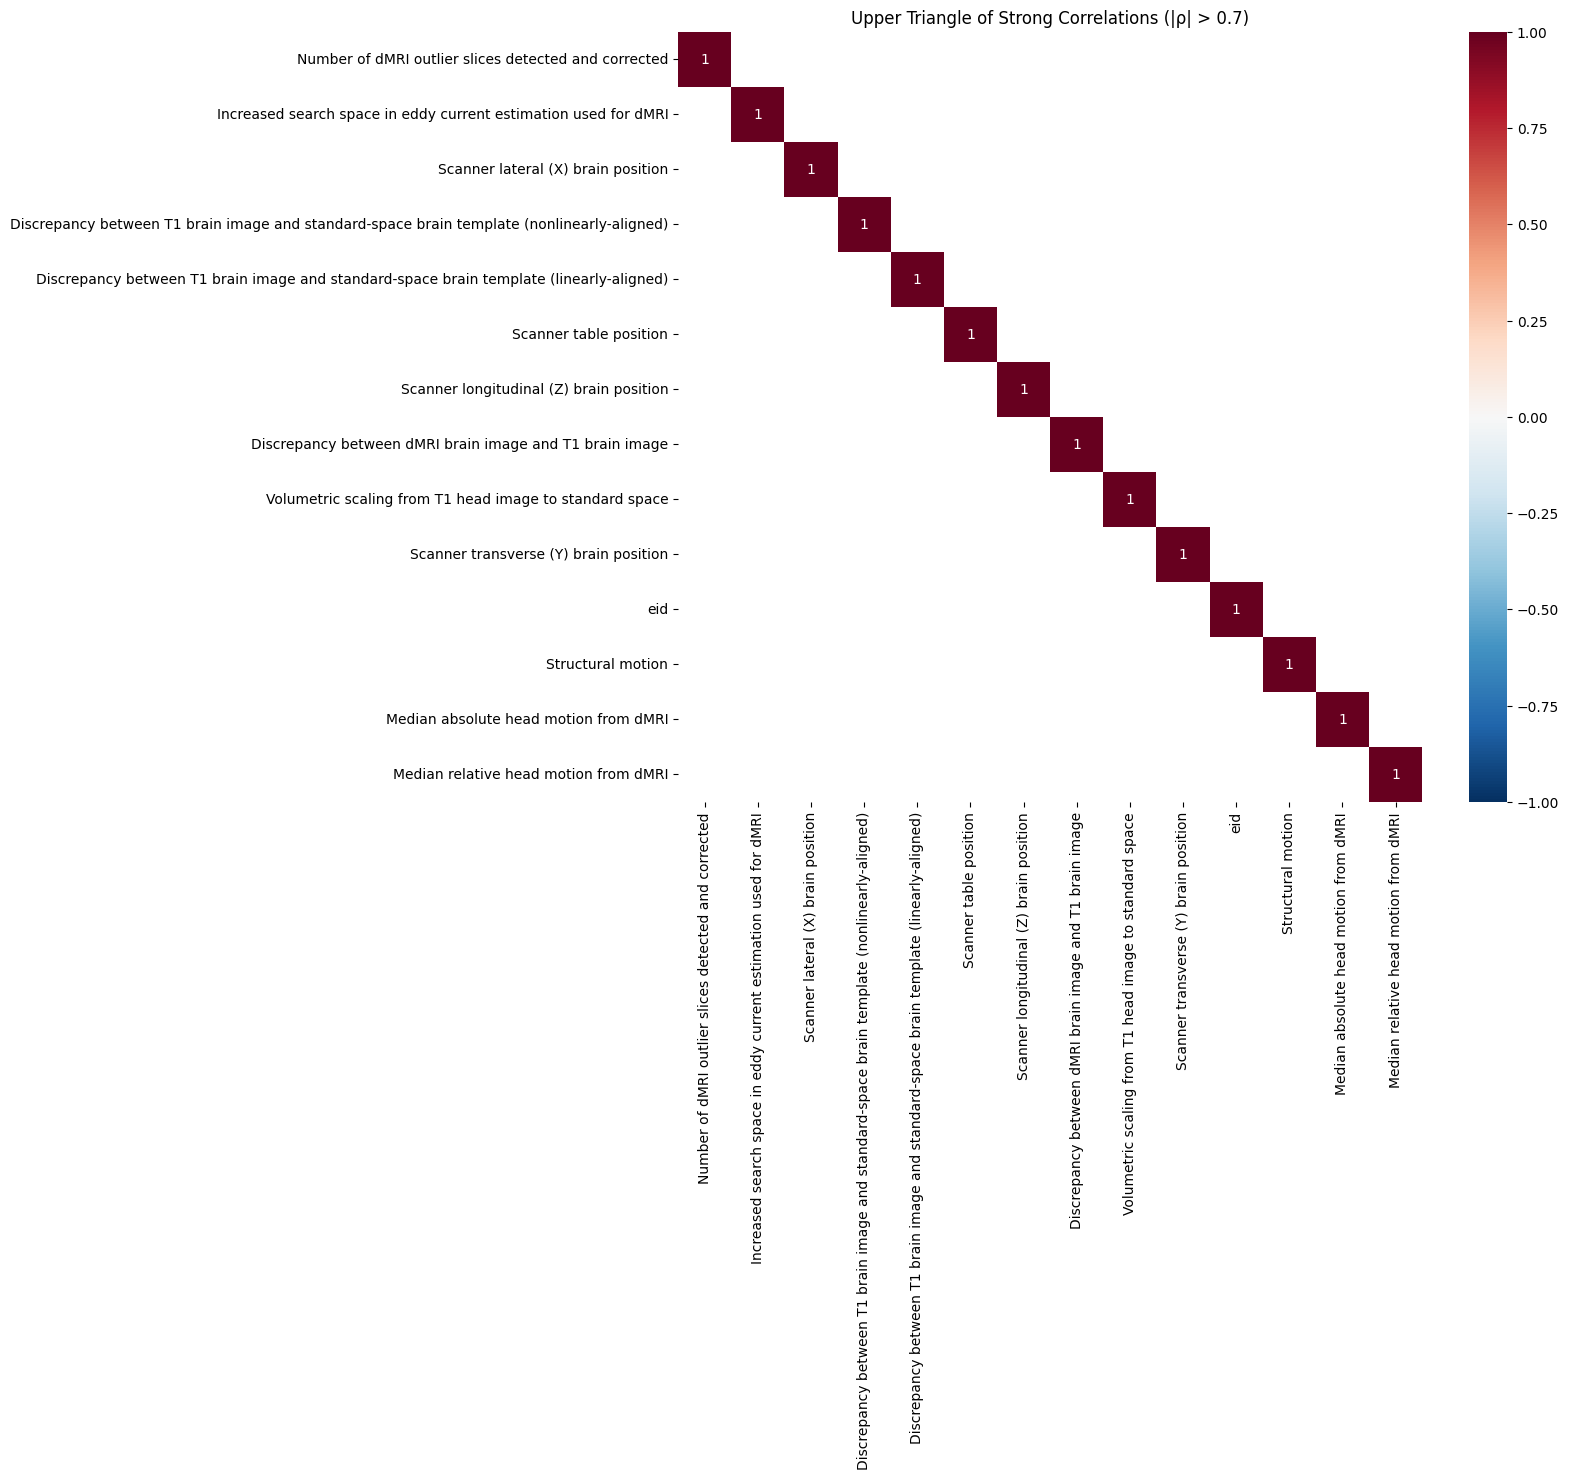

In [ ]:
# Confirm that confounds are not not correlated
rho, p = spearmanr(dwi_conf)
p = pd.DataFrame(p, columns = dwi_conf.columns, index=dwi_conf.columns).T
rho = pd.DataFrame(rho, columns = dwi_conf.columns, index=dwi_conf.columns).T
rho_sign = rho.where(rho > 0.7)
# Plot corelations between confounds
mask = np.triu(np.ones_like(rho, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(rho.where(mask & (np.abs(rho)>0.7)), 
            annot=True, 
            cmap='RdBu_r',
            center=0,
            vmin=-1, vmax=1)
plt.title("Upper Triangle of Strong Correlations (|ρ| > 0.7)")
plt.show()